/tmp/ipykernel_9358/3716098234.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


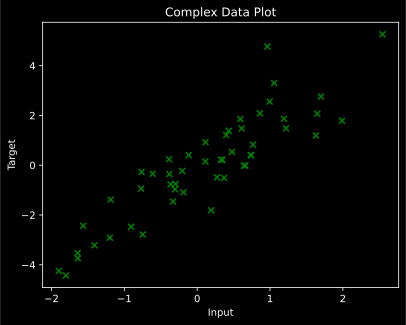

In [1]:






# Import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


plt.style.use('dark_background')
# Create new complex data
N = 50
x_complex = torch.randn(N, 1)
y_complex = 2 * x_complex + torch.randn(N, 1)

# Plot the new data
plt.scatter(x_complex, y_complex, marker='x', color='green')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Complex Data Plot')
plt.show()


In [2]:
# Build a new neural network model
complex_model = nn.Sequential(
    nn.Linear(1, 1),   # Input layer
    nn.ReLU(),         # Activation function
    nn.Linear(1, 1)    # Output layer
)

complex_model


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [3]:
# Set a new learning rate
learningRate_complex = 0.06

# Define a new loss function
lossfun_complex = nn.MSELoss()

# Create a new optimizer
optimizer_complex = torch.optim.SGD(complex_model.parameters(), lr=learningRate_complex)


In [4]:
# Train the complex model
numepochs_complex = 4000
losses_complex = []

for epoch_complex in range(numepochs_complex):
    # Forward pass
    yHat_complex = complex_model(x_complex)
    
    # Compute loss
    loss_complex = lossfun_complex(yHat_complex, y_complex)
    losses_complex.append(loss_complex.item())
    
    # Backpropagation
    optimizer_complex.zero_grad()
    loss_complex.backward()
    optimizer_complex.step()


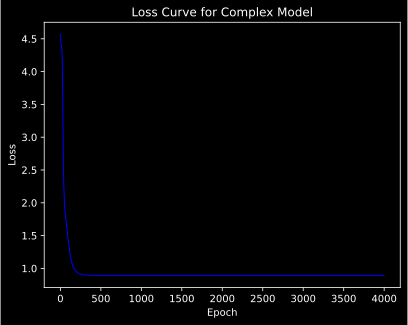

In [5]:
# Show the loss curve
plt.plot(losses_complex, 'b-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Complex Model')
plt.show()


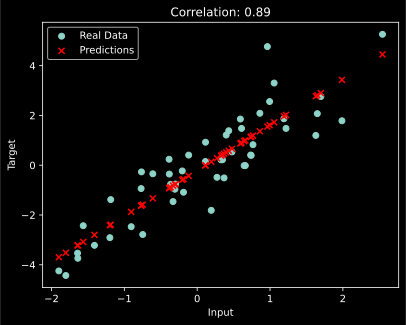

In [6]:
# Plot the new data and predictions
predictions_complex = complex_model(x_complex)

plt.scatter(x_complex, y_complex, marker='o', label='Real Data')
plt.scatter(x_complex, predictions_complex.detach(), marker='x', color='red', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title(f'Correlation: {np.corrcoef(y_complex.T, predictions_complex.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()
